In [2]:
import svjflatanalysis
import numpy as np
from time import strftime
import os
import os.path as osp
from glob import glob
import imp, importlib
import mplhep
import seutils

import matplotlib.pyplot as plt
import numpy as np
import coffea

   INFO:2020-12-08 10:53:49:__init__:32 Using tqdm notebook


In [35]:
importlib.reload(svjflatanalysis.samples)
importlib.reload(svjflatanalysis.dataset)
bkgs = svjflatanalysis.samples.init_bkg_features()

/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.TTJets_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.ZJetsToNuNu_HT-600To800_13TeV-madgraph*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.ZJetsToNuNu_HT-200To400_13TeV-madgraph*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8*.npz


  ERROR:2020-12-08 11:30:54:dataset:395 Error loading /Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_batch57_N4000.npz - skipping


/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.QCD_Pt_470to600_TuneCP5_13TeV_pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.ZJetsToNuNu_HT-1200To2500_13TeV-madgraph*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.QCD_Pt_300to470_TuneCP5_13TeV_pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.QCD_Pt_800to1000_TuneCP5_13TeV_pythia8_ext1*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.TTJets_SingleLeptFromT_genMET-80_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.ZJetsToNuNu_HT-400To600_13TeV-madgraph*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/Autumn18.QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8*.npz
/

In [36]:
for bkg in bkgs:
    if bkg.get_category() == 'ttjets':
        print(bkg.name, bkg.features.shape[0])

Autumn18.TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8 5514
Autumn18.TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8 10370
Autumn18.TTJets_HT-800to1200_TuneCP5_13TeV-madgraphMLM-pythia8 643882
Autumn18.TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8 382365
Autumn18.TTJets_HT-1200to2500_TuneCP5_13TeV-madgraphMLM-pythia8 947498
Autumn18.TTJets_HT-2500toInf_TuneCP5_13TeV-madgraphMLM-pythia8 1315913
Autumn18.TTJets_SingleLeptFromT_TuneCP5_13TeV-madgraphMLM-pythia8 9198


In [37]:
sigs = svjflatanalysis.samples.init_sig_features()

/Users/klijnsma/work/svj/flat/data/features_Dec07/year2018_mz250*.npz
/Users/klijnsma/work/svj/flat/data/features_Dec07/year2018_mz150*.npz


In [202]:
X, y = svjflatanalysis.dataset.weighted_feature_array(sigs[0:1] + bkgs, 1000000)

   INFO:2020-12-08 12:45:36:dataset:442  630 ( 630.63) events for year2018_mz250
   INFO:2020-12-08 12:45:36:dataset:442 2411 (2411.72) events for Autumn18.WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8
   INFO:2020-12-08 12:45:36:dataset:442 10194 (10194.45) events for Autumn18.QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8
   INFO:2020-12-08 12:45:36:dataset:442    0 (   0.18) events for Autumn18.QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8
   INFO:2020-12-08 12:45:36:dataset:442 1993 (1993.52) events for Autumn18.TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8
   INFO:2020-12-08 12:45:36:dataset:442  255 ( 255.12) events for Autumn18.ZJetsToNuNu_HT-600To800_13TeV-madgraph
   INFO:2020-12-08 12:45:36:dataset:442 3876 (3876.19) events for Autumn18.TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8
   INFO:2020-12-08 12:45:36:dataset:442    0 (   0.00) events for Autumn18.ZJetsToNuNu_HT-200To400_13TeV-madgraph
   INFO:2020-12-08 12:45:36:dataset:442   10 (  10.96) events for Aut

In [203]:
print(X.shape)
print(y.shape)

(766030, 34)
(766030,)


_Done data prep_

# Finding good cuts

In [204]:
def sb(X, y):
    """
    Returns the sorted feature array, likewise-sorted label array, and the cumulative signal and background counts
    """
    # Sort the arrays
    sorter = X.argsort()
    X = X[sorter]
    y = y[sorter]
    s = np.cumsum(y==1)
    b = np.cumsum(y==0)
    s_reverse = np.cumsum(np.flip(y)==1)
    b_reverse = np.cumsum(np.flip(y)==0)
    return X, y, s, b, s_reverse, b_reverse
    
def ams(s, b, b_r=1000):
    """ b_r: constant regularization term """
    return np.sqrt( 2 * ( (s + b + b_r) * np.log ( 1 + s / (b + b_r) ) - s ) )

def best_split_soversqrtb(X, y, do_ams=False, skip_features=None, verbose=True):
    n_features = X.shape[1]
    best_i_feature = None
    best_feature_cut = None
    best_operator = None
    best_metric = 0.
    best_n_sig_left = 0
    best_n_bkg_left = 0
    
    for i_feature in range(n_features):
        if skip_features and i_feature in skip_features: continue
        sorted_x, sorted_y, s, b, s_reverse, b_reverse = sb(X[:,i_feature], y)
                
        if do_ams:
            metric = lambda s, b: ams(s, b)
        else:
            metric = lambda s, b: svjflatanalysis.arrayutils.safe_divide(s.astype(np.float), np.sqrt(b))
        
        metric_lessthan = metric(s, b)
        metric_greaterthan = metric(s_reverse, b_reverse)

        if np.max(metric_lessthan) > np.max(metric_greaterthan):
            metric = metric_lessthan
            operator = '<'
        else:
            metric = metric_greaterthan
            operator = '>'
            sorted_x = np.flip(sorted_x)
            sorted_y = np.flip(sorted_y)
                
        i_max = np.argmax(metric)
        n_sig_left = np.sum(sorted_y[:i_max+1]==1)
        n_bkg_left = np.sum(sorted_y[:i_max+1]==0)
        if verbose: print(
            '  best cut for feature {}: val {} {:.2f} (metric={:.3f}, s={}, b={})'
            .format(
                svjflatanalysis.arrayutils.feature_labels[i_feature],
                operator, sorted_x[i_max], metric[i_max], n_sig_left, n_bkg_left
                )
            )
        if metric[i_max] > best_metric:
            best_metric = metric[i_max]
            best_i_feature = i_feature
            best_feature_cut = sorted_x[i_max]
            best_operator = operator
            best_n_sig_left = n_sig_left
            best_n_bkg_left = n_bkg_left
            
    return best_i_feature, best_feature_cut, best_metric, best_operator, best_n_sig_left, best_n_bkg_left

In [246]:
def run_algo(verbose=True, skip_features=None):
    X_cut = X
    y_cut = y
    
    print(
        'Initial s={s} b={b}'
        .format(s=(y==1).sum(), b=(y==0).sum())
        )
    
    for i in range(100):
        n_precut = y_cut.shape[0]
        i_feature, cut, metric, operator, nsigleft, nbkgleft = best_split_soversqrtb(
            X_cut, y_cut, do_ams=True,
            verbose=verbose, skip_features=skip_features
            )

        if i_feature is None:
            print('No further good cut to make!')
            break

        print(
            'CUT: {:22s} {} {:8.3f} (metric={:.3f}  s={:<5} b={:<5})'
            .format(
                svjflatanalysis.arrayutils.feature_labels[i_feature],
                operator, cut, metric, nsigleft, nbkgleft
                )
            )

        if nbkgleft==0:
            print('Background fully reduced!')
            break

        if operator == '<':
            selection = X_cut[:,i_feature] < cut
        else:
            selection = X_cut[:,i_feature] > cut

        X_cut = X_cut[selection]
        y_cut = y_cut[selection]

In [250]:
run_algo(verbose=False)

Initial s=630 b=765400
CUT: leading_rt1            >    1.136 (metric=1.627  s=206   b=14956)
CUT: subleading_ptd         <    0.303 (metric=2.029  s=148   b=4269 )
CUT: subleading_axisminor   >    0.054 (metric=2.124  s=137   b=3113 )
CUT: deltaeta               <    1.758 (metric=2.164  s=126   b=2350 )
CUT: subleading_pt          <  597.203 (metric=2.201  s=125   b=2183 )
CUT: leading_eta            <    1.601 (metric=2.221  s=124   b=2076 )
CUT: subleading_axismajor   >    0.103 (metric=2.226  s=122   b=1964 )
CUT: subleading_ecfN2b2     > -99999.000 (metric=2.246  s=121   b=1863 )
CUT: subleading_girth       <    0.548 (metric=2.083  s=101   b=1318 )
CUT: subleading_ecfN2b2     >    0.106 (metric=2.091  s=99    b=1208 )
CUT: subleading_girth       >    0.179 (metric=2.093  s=98    b=1160 )
CUT: leading_ecfN2b1        >   -1.000 (metric=2.107  s=97    b=1088 )
CUT: subleading_pt          <  565.824 (metric=2.002  s=91    b=1035 )
CUT: subleading_ecfN2b1     >    0.286 (metric=2.001

In [248]:
index = lambda feature_name: svjflatanalysis.arrayutils.feature_labels.index(feature_name)
skip_features = [
    index('met'), index('leading_mt'), index('subleading_mt'),
    index('leading_msd'), index('subleading_msd'),
    ]
run_algo(verbose=False, skip_features=skip_features)

Initial s=630 b=765400
CUT: leading_rt1            >    1.136 (metric=1.627  s=206   b=14956)
CUT: subleading_ptd         <    0.303 (metric=2.029  s=148   b=4269 )
CUT: subleading_axisminor   >    0.054 (metric=2.124  s=137   b=3113 )
CUT: deltaeta               <    1.758 (metric=2.164  s=126   b=2350 )
CUT: subleading_pt          <  597.203 (metric=2.201  s=125   b=2183 )
CUT: leading_eta            <    1.601 (metric=2.221  s=124   b=2076 )
CUT: subleading_axismajor   >    0.103 (metric=2.226  s=122   b=1964 )
CUT: subleading_ecfN2b2     > -99999.000 (metric=2.246  s=121   b=1863 )
CUT: subleading_girth       <    0.548 (metric=2.083  s=101   b=1318 )
CUT: subleading_ecfN2b2     >    0.106 (metric=2.091  s=99    b=1208 )
CUT: subleading_girth       >    0.179 (metric=2.093  s=98    b=1160 )
CUT: leading_ecfN2b1        >   -1.000 (metric=2.107  s=97    b=1088 )
CUT: subleading_pt          <  565.824 (metric=2.002  s=91    b=1035 )
CUT: subleading_ecfN2b1     >    0.286 (metric=2.001

# BDT

In [230]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [261]:
model = xgb.XGBClassifier(
    eta=0.1,
    max_depth=9,
    scale_pos_weight=1000.
    )
print(model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=9,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1000.0, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


array([[152668,    409],
       [   110,     19]])

In [262]:
y_pred_prob_sig = model.predict_proba(X_test)[:,1]

In [263]:
bkg_eff, sig_eff, thresholds = roc_curve(y_test, y_pred_prob_sig)

Text(0, 0.5, 'Sig eff')

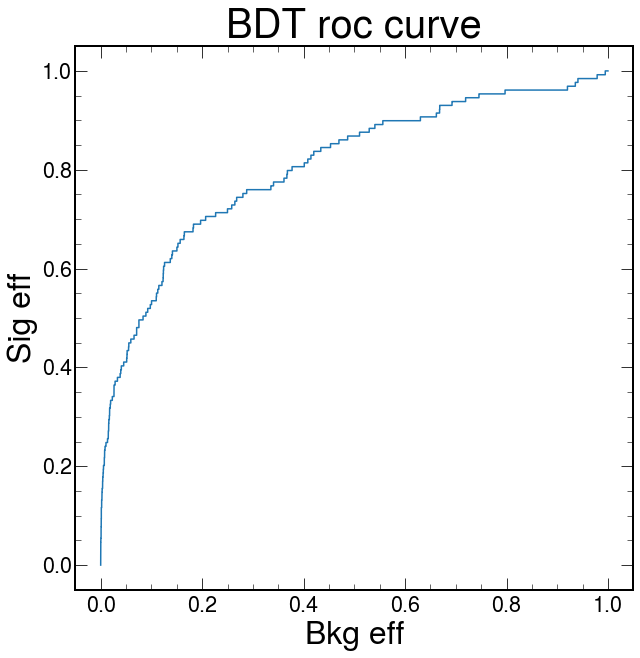

In [265]:
fig = plt.figure()
ax = fig.gca()

ax.plot(bkg_eff, sig_eff)
ax.set_title('BDT roc curve', fontsize=40)
ax.set_xlabel('Bkg eff', fontsize=32)
ax.set_ylabel('Sig eff', fontsize=32)